puntos dentro de la curva 5892
[[0.7004376  0.07702236]
 [1.77633816 0.38946397]
 [1.7685318  0.79072972]
 ...
 [2.22179866 0.12244818]
 [1.93925711 0.07044326]
 [0.1608666  0.02779072]]


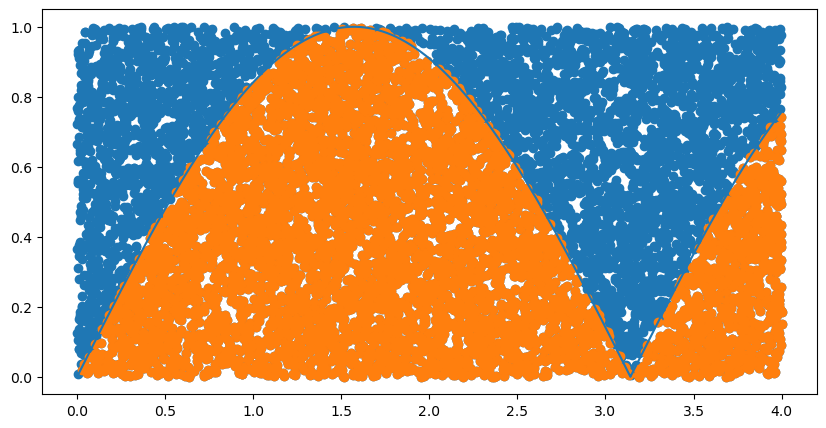

2.3567999695423145


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize

a=0
b=4

def funcion(z):
    return abs(math.sin(z))

prueba_funcion = funcion

def integra_mc(fun, a, b, num_puntos):


    # generar puntos--------------------
    x = np.random.rand(num_puntos)*b
    y = np.random.rand(num_puntos)



    ###generar valores de funcion
    z = np.linspace(a,b,num_puntos)
    f_z=[fun(i) for i in z]

    ##saber el maximo valor de la funcion de forma manual
    maximo_valor= max([fun(i) for i in z])


    ##conteo de puntos dentro del area
    puntos=np.column_stack((x,y))


    #para filtros    
    def valor_y_menor_a_la_curva(sublist):
        return fun(sublist[0])>sublist[1]

    #para filtros
    def valor_x_entre_a_b(sublist):
        return sublist[0] >a and sublist[0]<b

    # Filtrar el array utilizando la función numpy.where y numpy.apply_along_axis
    puntos_dentro_la_curva = puntos[np.apply_along_axis(valor_y_menor_a_la_curva, 1, puntos)] ##para que sean menor al maximo
    puntos_dentro_la_curva = puntos_dentro_la_curva[np.apply_along_axis(valor_x_entre_a_b,1,puntos_dentro_la_curva)] ##para que este entre a y b
    print(f'puntos dentro de la curva {len(puntos_dentro_la_curva)}')

    #para graficar los puntos dentros
    x_dentros,y_dentros=np.hsplit(puntos_dentro_la_curva, 2)


    # visualizar
    plt.figure(figsize=(10,5))
    plt.scatter(x,y)
    plt.scatter(x_dentros,y_dentros)
    print(puntos_dentro_la_curva)
    plt.plot(z, f_z)
    plt.show()

    integral = len(puntos_dentro_la_curva)/num_puntos *(b-a)* maximo_valor
    print(integral)
    return integral


if __name__=='__main__':
    integra_mc(prueba_funcion,a,b,num_puntos=10000)

